# Dependance of Rayleigh wrt airmass

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2024/11/24
- last update : 2024/11/25


This emulator is based from datagrid of atmospheric transparencies extracted from libradtran

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Imports

In [3]:
from getObsAtmo.getObsAtmo import ObsAtmo,validateObsName,Dict_Of_sitesPressures,getObsSiteDataFrame

# Check information

In [4]:
Dict_Of_sitesPressures

{'LSST': 731.50433,
 'CTIO': 774.6052,
 'OHP': 937.22595,
 'PDM': 710.90637,
 'OMK': 600.17224,
 'OSL': 1013.0}

### Choose Rubin-LSST observation sites but other sites may be chosen

In [5]:
obssitename = 'LSST'
obs_str = validateObsName(obssitename) 
std_pressure = Dict_Of_sitesPressures[obs_str]

In [6]:
emul =  ObsAtmo(obs_str= obssitename)

LSST site name validated as LSST observatory


# Typical transmission plot

- show a typical transmission plot

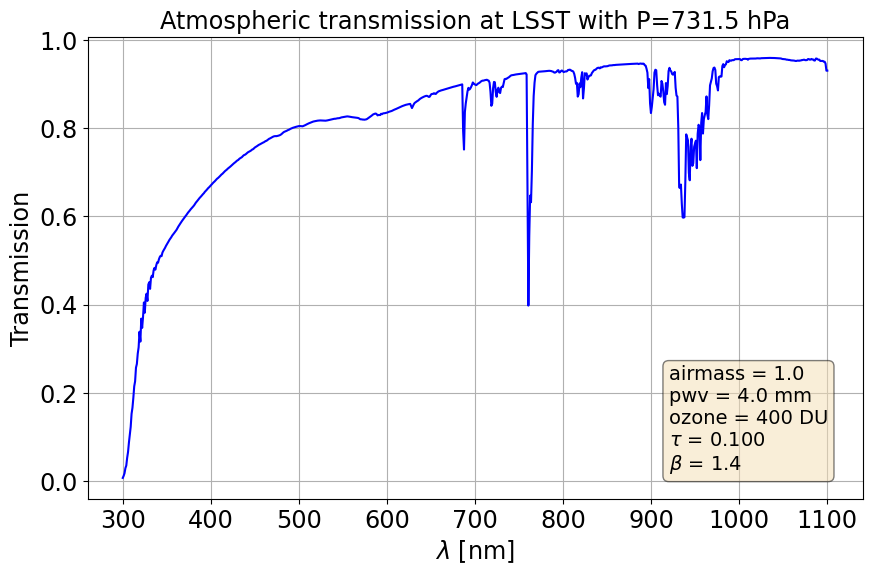

In [7]:
emul.plot_transmission()

# Setting atmospheric parameters

In [8]:
WL = emul.GetWL()
airmasses = emul.AIRMASS
NAM = len(airmasses)
pwvs = emul.PWV
NPWV = len(pwvs)
ozs = emul.OZ
NOZ = len(ozs)

In [9]:
airmasses

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.3 ,
       1.4 , 1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.  , 2.1 , 2.2 , 2.3 , 2.4 ,
       2.5 ])

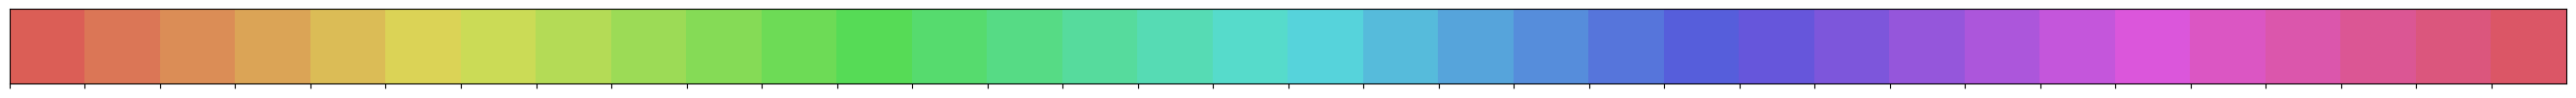

In [10]:
hls_colors = sns.color_palette("hls", NAM)
sns.palplot(hls_colors)

## Check emulator with Rayleigh scattering

Expect no difference

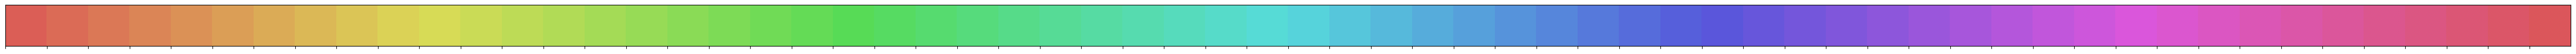

In [11]:
hls_colors = sns.color_palette("hls", NPWV)
sns.palplot(hls_colors)

In [12]:
WLtest = np.arange(350,1000,100)

In [13]:
WLtest

array([350, 450, 550, 650, 750, 850, 950])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


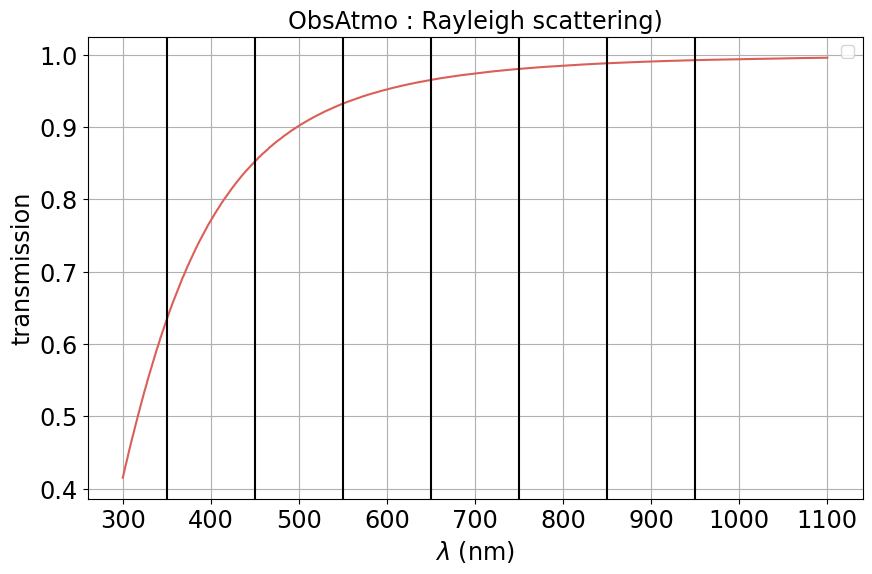

In [14]:
am =1

fig, ax = plt.subplots()

transm = emul.GetRayleighTransparencyArray(WL,am)
  
  
ax.plot(WL,transm,"-",color=hls_colors[0])
        
title = f"ObsAtmo : Rayleigh scattering)"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
#ax.set_xlim(680.,780.)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

for wl in WLtest:
    ax.axvline(wl,color="k")

plt.show()

## Dependence with airmass

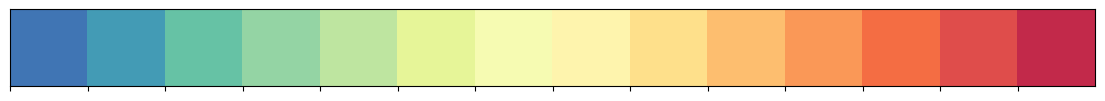

In [15]:
WLtest = np.arange(350,1050,50)
NWLtest = len(WLtest)
hls_colors = sns.color_palette("Spectral_r", NWLtest)
#hls_colors = sns.color_palette("coolwarm",NWLtest)
#sns.palplot(hls_colors)
sns.palplot(hls_colors)

In [16]:
binnumber = np.digitize(WLtest,WLtest)
binnumber

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [17]:
linestyles = ["-","--","-.",":",  "-","--","-.",":"]
linewidths = [4,4,4,4,2,2,2,2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


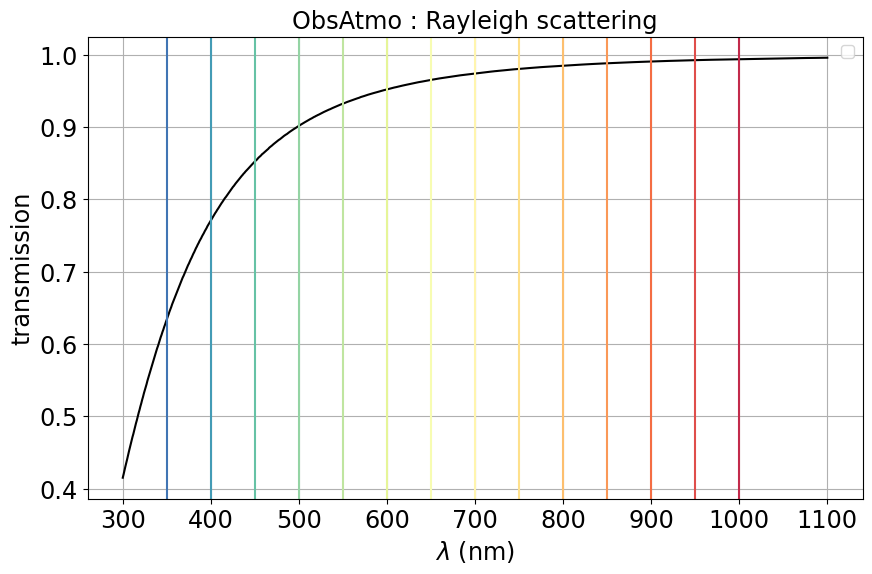

In [18]:
am =1

fig, ax = plt.subplots()

transm = emul.GetRayleighTransparencyArray(WL,am)

ax.plot(WL,transm,"-",color="k")
        
title = f"ObsAtmo : Rayleigh scattering"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
#ax.set_xlim(680.,780.)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)

for idx,wl in enumerate(WLtest):
    ax.axvline(wl,color=hls_colors[idx])

ax.grid()
ax.legend()


## Plot

Text(0.5, 1.0, 'Rayleigh scatt transmission vs $airmass$')

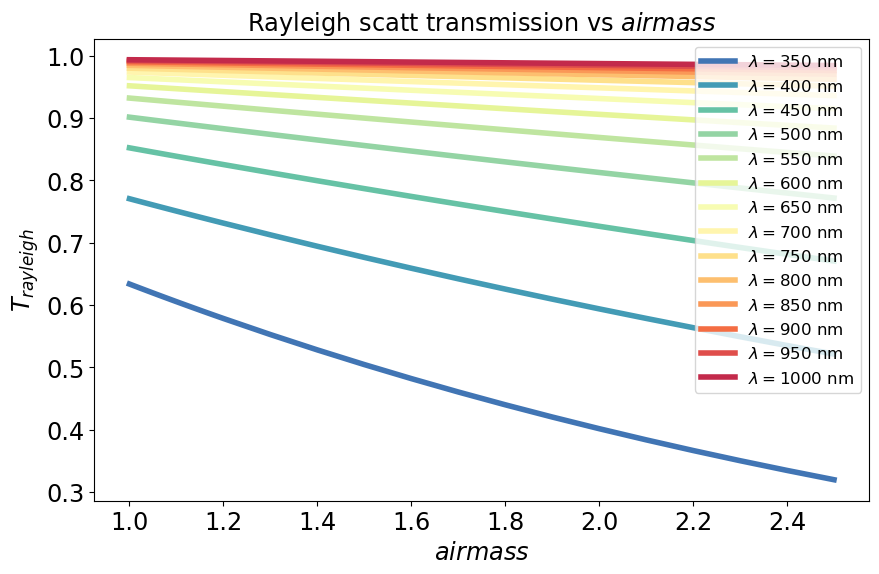

In [19]:
fig,ax = plt.subplots(1,1)

# compute a new transmission array in airmass x wl
transmarray = np.zeros((NAM,NWLtest))
    
for idx_am,airmass in enumerate(airmasses):
    transmarray[idx_am,:]  = emul.GetRayleighTransparencyArray(WLtest,airmass)
    # normalize wrt airmass = 1 for each wavelength
    #norm_am0 = np.copy(transmarray[0,:])
    
    # renormalize to first airmass
    #for idx_am,airmass in enumerate(airmasses):
    #    transmarray[idx_am,:] =  transmarray[idx_am,:]/norm_am0

    # plot attenuation 
for idx_wl,wl in enumerate(WLtest):
    x = airmasses
    y = transmarray[:,idx_wl]
        
    bin_number_for_wl = np.digitize(wl,WLtest)-1
    the_wl_color = hls_colors[bin_number_for_wl]
    ls = linestyles[0]
    lw = linewidths[0]

    
    label = "$\\lambda = $" + f"{wl:.0f} nm"
    ax.plot(x,y,color=the_wl_color,ls = ls,lw=lw,label=label)
        
ax.legend(loc='upper right')
ax.set_xlabel("$airmass$")  
ax.set_ylabel("$T_{rayleigh}$")  
ax.set_title("Rayleigh scatt transmission vs $airmass$")

Text(0.5, 1.0, 'Rayleigh scatt extinction vs $airmass$')

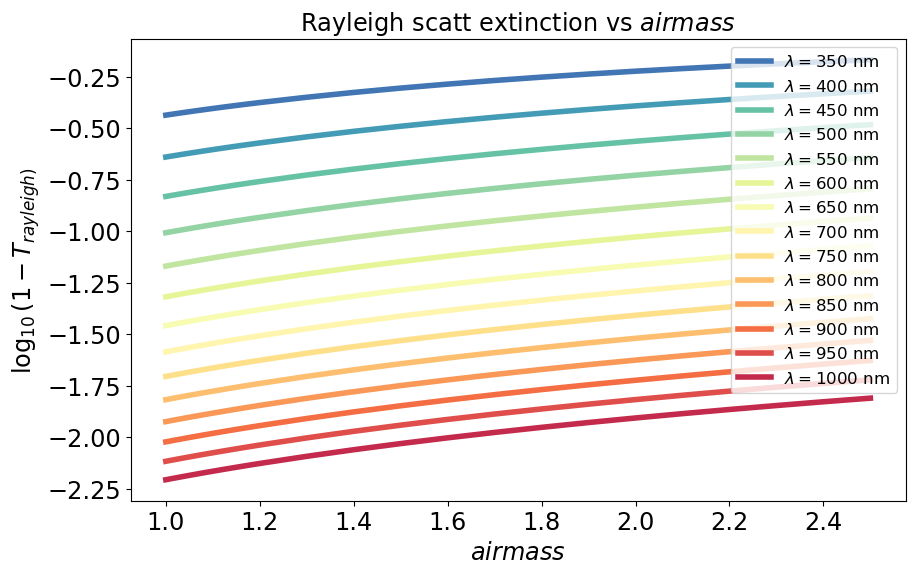

In [20]:
fig,ax = plt.subplots(1,1)

# compute a new transmission array in airmass x wl
transmarray = np.zeros((NAM,NWLtest))
    
for idx_am,airmass in enumerate(airmasses):
    transmarray[idx_am,:]  = emul.GetRayleighTransparencyArray(WLtest,airmass)
    # normalize wrt airmass = 1 for each wavelength
    #norm_am0 = np.copy(transmarray[0,:])
    
    # renormalize to first airmass
    #for idx_am,airmass in enumerate(airmasses):
    #    transmarray[idx_am,:] =  transmarray[idx_am,:]/norm_am0

    # plot attenuation 
for idx_wl,wl in enumerate(WLtest):
    x = airmasses
    y = np.log10(1-transmarray[:,idx_wl])
        
    bin_number_for_wl = np.digitize(wl,WLtest)-1
    the_wl_color = hls_colors[bin_number_for_wl]
    ls = linestyles[0]
    lw = linewidths[0]

    
    label = "$\\lambda = $" + f"{wl:.0f} nm"
    ax.plot(x,y,color=the_wl_color,ls = ls,lw=lw,label=label)
        
ax.legend(loc='upper right')
ax.set_xlabel("$airmass$")  
ax.set_ylabel("$\\log_{10}(1-T_{rayleigh)}$")  
ax.set_title("Rayleigh scatt extinction vs $airmass$")

Text(0.5, 1.0, 'Rayleigh scatt extinction vs $airmass$')

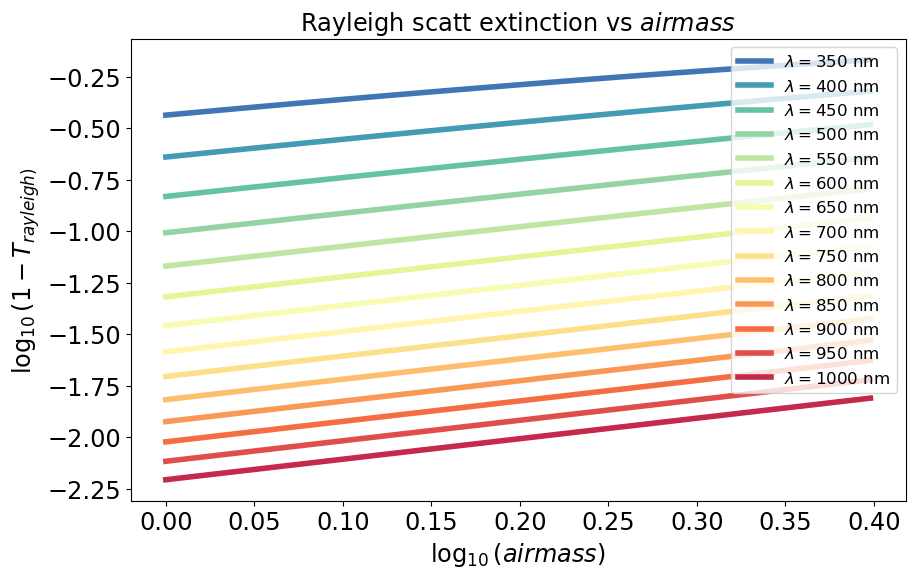

In [21]:
fig,ax = plt.subplots(1,1)

# compute a new transmission array in airmass x wl
transmarray = np.zeros((NAM,NWLtest))
    
for idx_am,airmass in enumerate(airmasses):
    transmarray[idx_am,:]  = emul.GetRayleighTransparencyArray(WLtest,airmass)
    # normalize wrt airmass = 1 for each wavelength
    #norm_am0 = np.copy(transmarray[0,:])
    
    # renormalize to first airmass
    #for idx_am,airmass in enumerate(airmasses):
    #    transmarray[idx_am,:] =  transmarray[idx_am,:]/norm_am0

    # plot attenuation 
for idx_wl,wl in enumerate(WLtest):
    x = np.log10(airmasses)
    y = np.log10(1-transmarray[:,idx_wl])
        
    bin_number_for_wl = np.digitize(wl,WLtest)-1
    the_wl_color = hls_colors[bin_number_for_wl]
    ls = linestyles[0]
    lw = linewidths[0]

    
    label = "$\\lambda = $" + f"{wl:.0f} nm"
    ax.plot(x,y,color=the_wl_color,ls = ls,lw=lw,label=label)
        
ax.legend(loc='upper right')
ax.set_xlabel("$\\log_{10}(airmass)$")  
ax.set_ylabel("$\\log_{10}(1-T_{rayleigh)}$")  
ax.set_title("Rayleigh scatt extinction vs $airmass$")

## Fit

Text(0.5, 1.0, 'Rayleigh scatt extinction vs $airmass$')

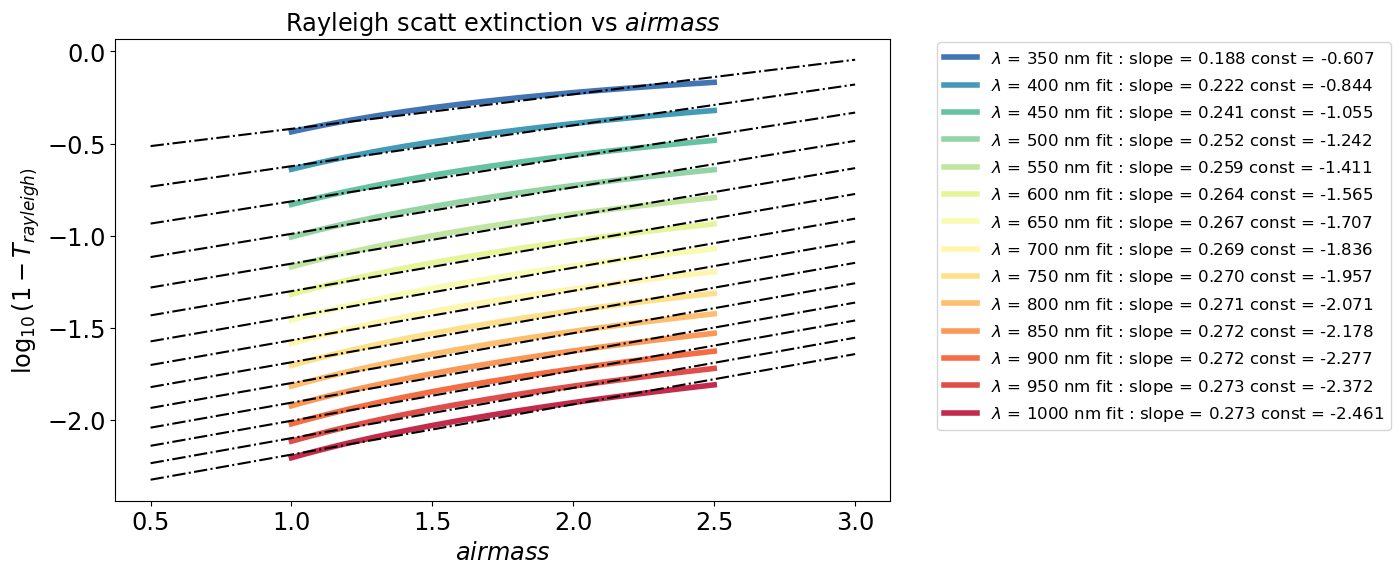

In [22]:
xfit = np.linspace(0.5,3.,100)

fig,ax = plt.subplots(1,1)

# compute a new transmission array in airmass x wl
transmarray = np.zeros((NAM,NWLtest))
    
for idx_am,airmass in enumerate(airmasses):
    transmarray[idx_am,:]  = emul.GetRayleighTransparencyArray(WLtest,airmass)

# plot attenuation 
for idx_wl,wl in enumerate(WLtest):
    x = airmasses
    y = np.log10(1-transmarray[:,idx_wl])

    z = np.polyfit(x, y, deg=1)
    p = np.poly1d(z)
    gamma = z[0]
    const = z[1]
    
        
    bin_number_for_wl = np.digitize(wl,WLtest)-1
    the_wl_color = hls_colors[bin_number_for_wl]
    ls = linestyles[0]
    lw = linewidths[0]

    
    label = "$\\lambda$ = "+f"{wl:.0f} nm "+ f"fit : slope = {gamma:.3f} const = {const:.3f}"
    
    ax.plot(x,y,color=the_wl_color,ls = ls,lw=lw,label=label)
    ax.plot(xfit,p(xfit),'-.',color="k")
        
#ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.set_xlabel("$airmass$")  
ax.set_ylabel("$\\log_{10}(1-T_{rayleigh)}$")  
ax.set_title("Rayleigh scatt extinction vs $airmass$")

Text(0.5, 1.0, 'Rayleigh scatt extinction vs $airmass$')

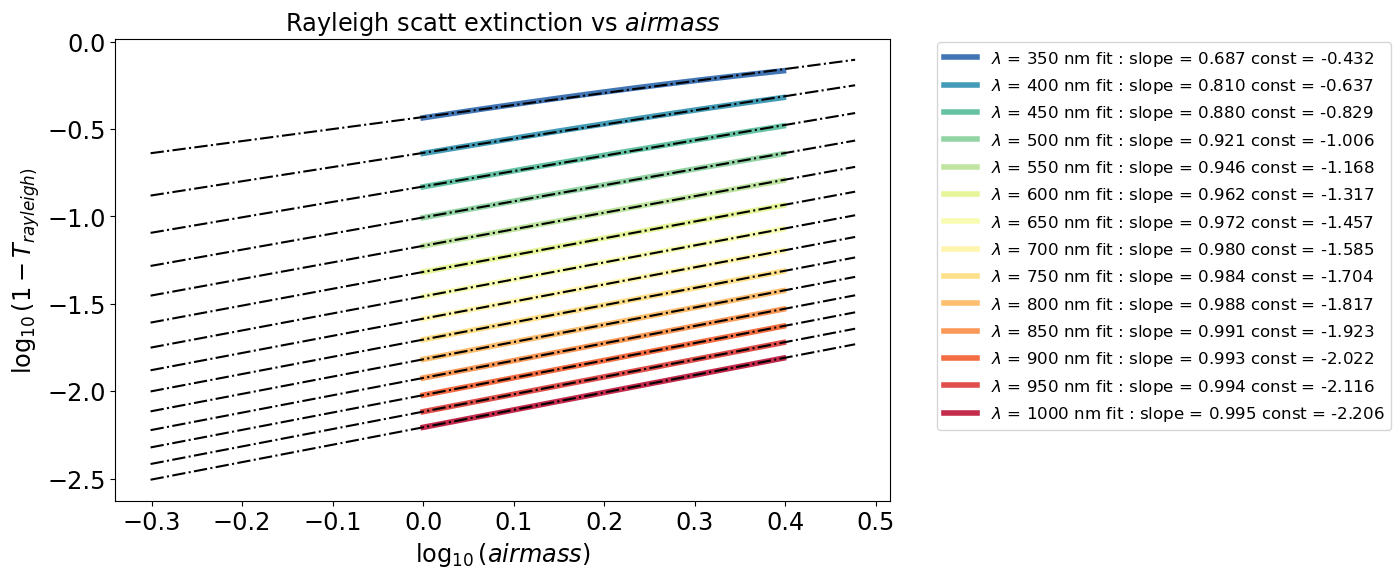

In [23]:
xfit = np.log10(np.linspace(0.5,3.,100))

fig,ax = plt.subplots(1,1)

# compute a new transmission array in airmass x wl
transmarray = np.zeros((NAM,NWLtest))
    
for idx_am,airmass in enumerate(airmasses):
    transmarray[idx_am,:]  = emul.GetRayleighTransparencyArray(WLtest,airmass)

# plot attenuation 
for idx_wl,wl in enumerate(WLtest):
    x = np.log10(airmasses)
    y = np.log10(1-transmarray[:,idx_wl])

    z = np.polyfit(x, y, deg=1)
    p = np.poly1d(z)
    gamma = z[0]
    const = z[1]
    
        
    bin_number_for_wl = np.digitize(wl,WLtest)-1
    the_wl_color = hls_colors[bin_number_for_wl]
    ls = linestyles[0]
    lw = linewidths[0]

    
    label = "$\\lambda$ = "+f"{wl:.0f} nm "+ f"fit : slope = {gamma:.3f} const = {const:.3f}"
    
    ax.plot(x,y,color=the_wl_color,ls = ls,lw=lw,label=label)
    ax.plot(xfit,p(xfit),'-.',color="k")
        
#ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.set_xlabel("$\\log_{10}(airmass)$")  
ax.set_ylabel("$\\log_{10}(1-T_{rayleigh)}$")  
ax.set_title("Rayleigh scatt extinction vs $airmass$")

Text(0.5, 1.0, 'Rayleigh scatt extinction-ratio data/fit value vs $airmass$')

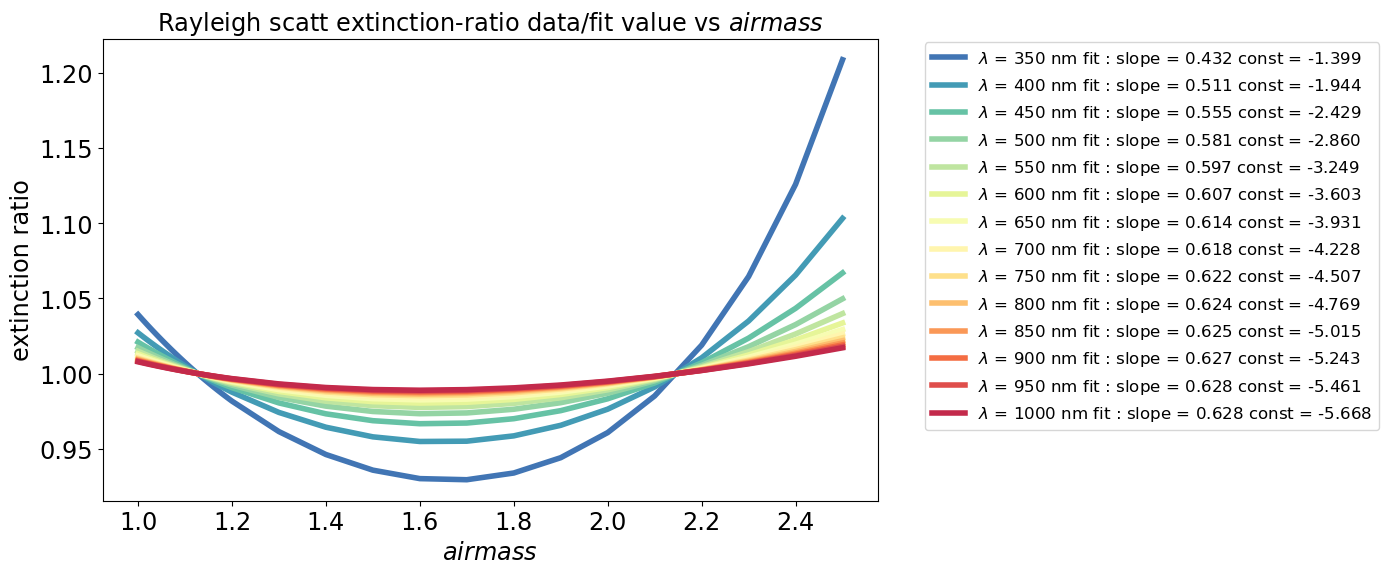

In [24]:
xfit = np.linspace(0.5,3.,100)

fig,ax = plt.subplots(1,1)

# compute a new transmission array in airmass x wl
transmarray = np.zeros((NAM,NWLtest))
    
for idx_am,airmass in enumerate(airmasses):
    transmarray[idx_am,:]  = emul.GetRayleighTransparencyArray(WLtest,airmass)

# plot attenuation 
for idx_wl,wl in enumerate(WLtest):
    x = airmasses
    y = np.log(1-transmarray[:,idx_wl])

    z = np.polyfit(x, y, deg=1)
    p = np.poly1d(z)
    gamma = z[0]
    const = z[1]
    
        
    bin_number_for_wl = np.digitize(wl,WLtest)-1
    the_wl_color = hls_colors[bin_number_for_wl]
    ls = linestyles[0]
    lw = linewidths[0]

    
    label = "$\\lambda$ = "+f"{wl:.0f} nm "+ f"fit : slope = {gamma:.3f} const = {const:.3f}"

    ratio_extinction = y/p(x)
    
    ax.plot(x,ratio_extinction,color=the_wl_color,ls = ls,lw=lw,label=label)
        
#ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.set_xlabel("$airmass$")  
ax.set_ylabel("extinction ratio")  
ax.set_title("Rayleigh scatt extinction-ratio data/fit value vs $airmass$")

Text(0.5, 1.0, 'Rayleigh scatt extinction-ratio data/fit value vs $airmass$')

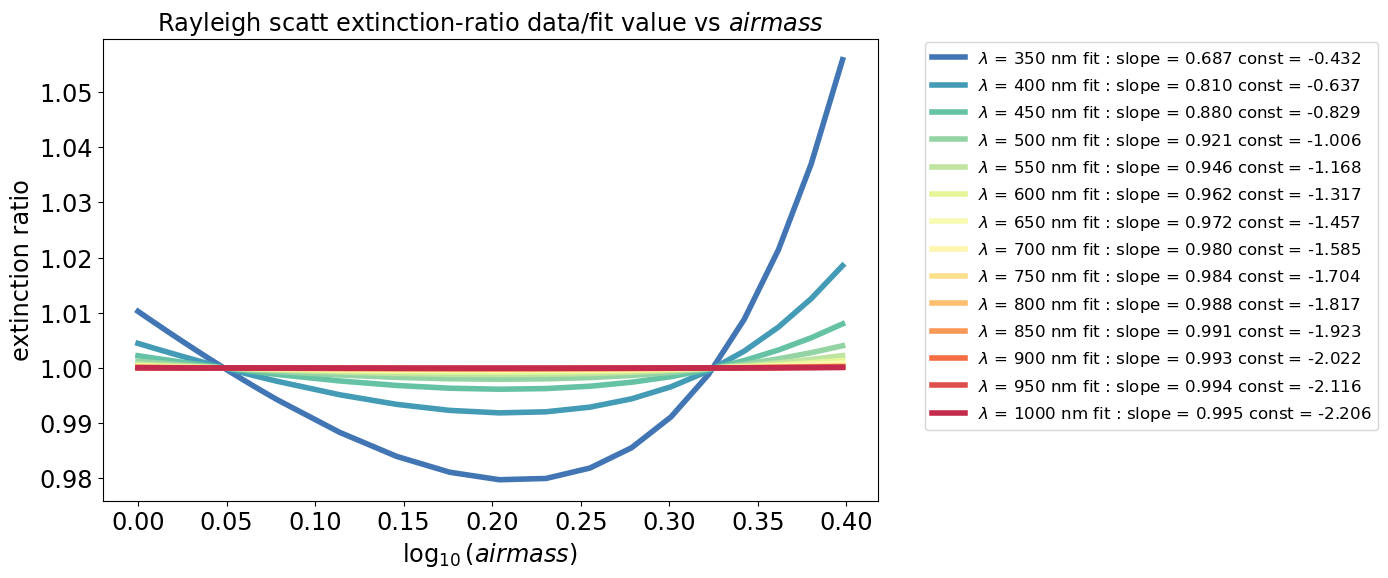

In [25]:
xfit = np.log10(np.linspace(0.5,3.,100))
fig,ax = plt.subplots(1,1)

# compute a new transmission array in airmass x wl
transmarray = np.zeros((NAM,NWLtest))
    
for idx_am,airmass in enumerate(airmasses):
    transmarray[idx_am,:]  = emul.GetRayleighTransparencyArray(WLtest,airmass)

# plot attenuation 
for idx_wl,wl in enumerate(WLtest):
    x = np.log10(airmasses)
    y = np.log10(1-transmarray[:,idx_wl])

    z = np.polyfit(x, y, deg=1)
    p = np.poly1d(z)
    gamma = z[0]
    const = z[1]
    
        
    bin_number_for_wl = np.digitize(wl,WLtest)-1
    the_wl_color = hls_colors[bin_number_for_wl]
    ls = linestyles[0]
    lw = linewidths[0]

    
    label = "$\\lambda$ = "+f"{wl:.0f} nm "+ f"fit : slope = {gamma:.3f} const = {const:.3f}"

    ratio_extinction = y/p(x)
    
    ax.plot(x,ratio_extinction,color=the_wl_color,ls = ls,lw=lw,label=label)
        
#ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.set_xlabel("$\\log_{10}(airmass)$")  
ax.set_ylabel("extinction ratio")  
ax.set_title("Rayleigh scatt extinction-ratio data/fit value vs $airmass$")